In [9]:
import pandas as pd
import yfinance as yf

# Download historical data
df = yf.download('PK', start='2020-01-01', end='2025-12-31')

# Keep relevant columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

[*********************100%***********************]  1 of 1 completed


In [10]:
# Shift 'High' to create the next day's price as the target
df['Next_High'] = df['High'].shift(-1)

# Drop last row (NaN in target)
df.dropna(inplace=True)

# Define features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Next_High']

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

Mean Squared Error: 0.05


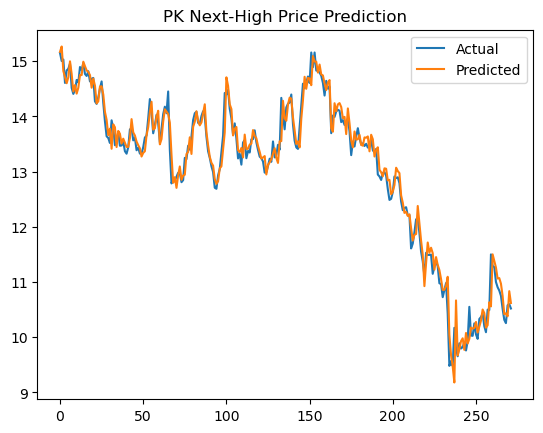

In [12]:
import matplotlib.pyplot as plt

# Calculate error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot actual vs. predicted
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('PK Next-High Price Prediction')
plt.legend()
plt.show()

In [13]:
y_test

Date
2024-04-26    15.147307
2024-04-29    15.002876
2024-04-30    15.029955
2024-05-01    14.605687
2024-05-02    14.831363
                ...    
2025-05-21    10.315000
2025-05-22    10.255000
2025-05-23    10.580000
2025-05-27    10.600000
2025-05-28    10.520000
Name: Next_High, Length: 272, dtype: float64

In [14]:
y_pred

array([15.16874167, 15.2661897 , 14.82207967, 14.71183519, 14.60006908,
       14.71067261, 14.99679036, 14.76779441, 14.45052841, 14.56634829,
       14.4121579 , 14.51865282, 14.75031631, 14.74771354, 14.99050879,
       14.90802542, 14.8324916 , 14.80515739, 14.74788917, 14.51974374,
       14.68466231, 14.55577789, 14.23663574, 14.27210055, 14.53992988,
       14.54585167, 14.3965031 , 14.08163382, 13.93861449, 13.65903914,
       13.77757161, 13.41353905, 13.85475383, 13.80350947, 13.4446865 ,
       13.73636451, 13.684613  , 13.50712962, 13.59628561, 13.51987693,
       13.44591907, 13.44692316, 13.60717139, 13.95044022, 13.71031748,
       13.65365486, 13.54447936, 13.47797991, 13.4217234 , 13.27273009,
       13.33823648, 13.36834685, 13.65983394, 13.80590063, 14.07034463,
       14.26440547, 13.76029745, 13.78640097, 13.98983813, 14.10167901,
       13.49351081, 13.58925426, 13.90363459, 14.12856952, 14.08395585,
       14.04241376, 13.88522081, 13.30540992, 12.79686706, 12.89